**ELI5** is yet another explainability package by MIT supporting ML frameworks and packages such as Scikit-learn, Keras, Xgboost, etc. With a unified API, comparing models here becomes easier across packages and frameworks. There are many other components such as Text-explainer for which it uses Lime algorithm and permutation importance. This package neatly categorizes the explanation into two parts :
Global which is show_weights() in which you can provide required parameters to specify type of global importance you wish to see (e.g. ‘gain’, ’weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’)
Local level explanations are given by eli5.show_prediction()which explain the local level predictions
Other functions such as eli5.formatterscan be used to get HTML,text,JSON or PIL image, etc. representation of the explanation.
There are no engaging visuals that I could spot in this package. It’s mostly the unified platform across various ML packages/frameworks that is its main highlight. Some outputs are given below with code snippets.


![N|Solid](https://miro.medium.com/max/700/1*cYl2tqPNn8tbNGKDsmE7WQ.png)


# Import libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
# Built-in libraries
import math
import numpy    as np
import pandas   as pd


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn           as sns

# Sklearn libraries
#
from sklearn                 import metrics
from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets        import load_breast_cancer

# Parameters

In [3]:
test_size = 0.1

# Import data

**Breast cancer wisconsin (diagnostic) dataset**
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign




This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.


**References**

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

## Loading data

In [4]:
# Load Breast Cancer dataset
data = load_breast_cancer() 

# Create DataFrame
#
df   = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column
#
df['class'] = data.target


# Show DataFrame
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## Pre-processing data

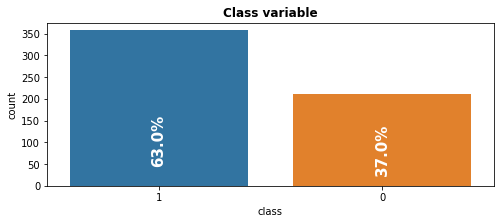

In [5]:
fig = plt.figure(figsize=(8,3))
ax  = sns.countplot(df['class'], order = df['class'].value_counts().index)

#Create annotate
for i in ax.patches:
    ax.text(x        = i.get_x() + i.get_width()/2, 
            y        = i.get_height()/7, 
            s        = f"{np.round(i.get_height()/len(df)*100)}%", 
            ha       = 'center', 
            size     = 15, 
            weight   = 'bold', 
            rotation = 90, 
            color    = 'white');
    

plt.title("Class variable", size=12, weight='bold');

### Training/Testing sets

In [6]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=42) 

# Model development

# Setup ML model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost model
#
model = GradientBoostingClassifier( random_state  = 42 )

## Training ML model

In [8]:
model.fit(trainX, trainY);

## Get Predictions


In [9]:
# Calculate prediction
#
pred = model.predict( testX )

# Performance accuracy
#
accuracy = metrics.accuracy_score(testY, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.49%


# ELI5

In [11]:
%%capture
! pip install eli5
! pip install lime

In [12]:
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# Explainability libraries
#
import lime
import eli5
from eli5 import show_weights
from eli5 import show_prediction
from eli5.sklearn import PermutationImportance

## Explainability/Visualizations 

###  Generate  global importances

In [19]:
#  Generate  global importances
#
show_weights( model )

Weight,Feature
0.3954 ± 0.4328,x7
0.2096 ± 0.3572,x20
0.1759 ± 0.3011,x27
0.0390 ± 0.3036,x23
0.0350 ± 0.3037,x22
0.0342 ± 0.1667,x21
0.0295 ± 0.0917,x26
0.0210 ± 0.1244,x1
0.0122 ± 0.2179,x13
0.0107 ± 0.0505,x16


### Local level explanation 

In [22]:
# Local level explanation 
#
eli5.show_prediction(model, testX.iloc[1],
                    feature_names = df.columns[:-1].to_list(),
                    show_feature_values=True)

### Local explanation (Compare plots)

In [24]:
# permutation based importance 
# sorted(sklearn.metrics.SCORERS.keys()) to check for options for scoring in Permutation importance
perm = PermutationImportance(model, scoring="roc_auc_ovr_weighted")

perm.fit(testX, testY)

eli5.show_weights(perm, feature_names=list(X.columns))

Weight,Feature
0.0074 ± 0.0098,worst radius
0.0053 ± 0.0088,worst area
0.0041 ± 0.0034,worst perimeter
0.0035 ± 0.0071,worst concavity
0.0032 ± 0.0146,worst concave points
0.0024 ± 0.0076,mean concave points
0.0012 ± 0.0022,mean area
0.0012 ± 0.0080,worst texture
0.0009 ± 0.0048,area error
0.0006 ± 0.0014,worst smoothness
